# Titanic Classification Project

This notebook demonstrates a machine learning approach to predicting Titanic survival outcomes based on passenger data.


In [76]:
import pandas as pd
import os

## Step 1: Data Loading

We start by importing the necessary libraries and loading the Titanic datasets for training and testing. Below, we also inspect the dataset to understand its structure and contents.


In [107]:
pwd = os.getcwd()
filepath1 = os.path.join(pwd, "train.csv")
filepath2 = os.path.join(pwd, "test.csv")


In [108]:
data_import_train = pd.read_csv(filepath1)
data_import_test = pd.read_csv(filepath2)
data_import_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Observations
- The training dataset contains 891 rows and 12 columns.
- Key features include passenger demographics, ticket class, and survival status.
- Some features, such as `Age` and `Cabin`, have missing values.


## Step 2: Exploratory Data Analysis (EDA)

In this section, we explore the data distributions and identify relationships between features. Visualizations and summary statistics help guide preprocessing steps.


In [109]:
data_import_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


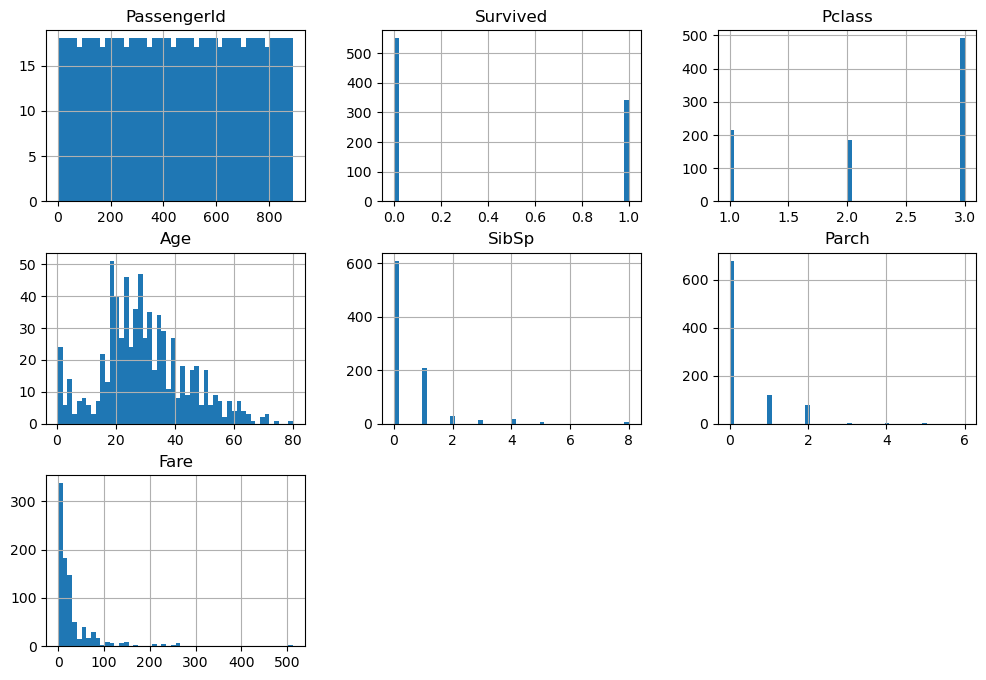

In [110]:
import matplotlib.pyplot as plt
data_import_train.hist(bins=50, figsize=(12,8))
plt.show()

In [111]:
# Select only numeric columns
numeric_data = data_import_train.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)



             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<Axes: >

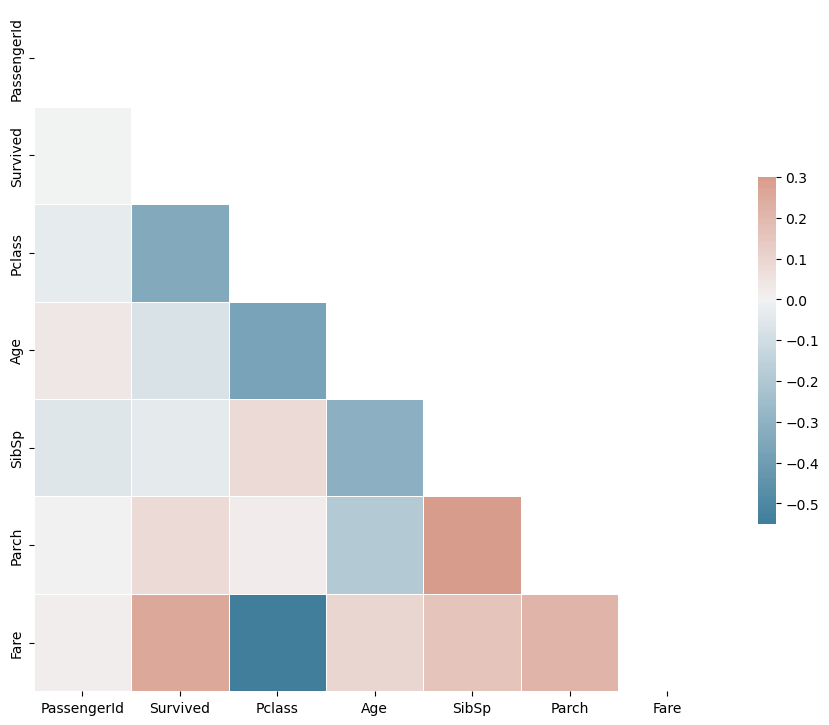

In [112]:
import seaborn as sns
import numpy as np
corr = correlation_matrix
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Key Insights from EDA
- The survival rate is higher for passengers in first class and for women.
- Missing values are significant in the `Age` and `Cabin` columns.
- The `Embarked` feature has a small number of missing values.


## Step 3: Data Preprocessing

Data cleaning and preprocessing are crucial to improving model performance. Below, we handle missing values, encode categorical variables, and normalize numerical features.


In [83]:
data_import_train = data_import_train.drop('Cabin', axis=1)
data_import_test = data_import_test.drop('Cabin', axis=1)

In [84]:
data_import_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [85]:
from sklearn.impute import SimpleImputer

# Filling missing values in the 'Age', 'Embarked', and 'Fare' columns
imputer_mean = SimpleImputer(strategy='mean')  # Filling with the mean
imputer_mode = SimpleImputer(strategy='most_frequent')  # Filling with the mode

# Using mean for Age and Fare
data_import_train['Age'] = imputer_mean.fit_transform(data_import_train[['Age']]).ravel()
data_import_test['Age'] = imputer_mean.transform(data_import_test[['Age']]).ravel()

data_import_test['Fare'] = imputer_mean.fit_transform(data_import_test[['Fare']]).ravel()  # Missing values may only exist in the test set

# Using mode (most frequent value) for Embarked
data_import_train['Embarked'] = imputer_mode.fit_transform(data_import_train[['Embarked']]).ravel()
data_import_test['Embarked'] = imputer_mode.transform(data_import_test[['Embarked']]).ravel()


In [86]:
data_import_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Missing values are filled completely.

### Encode Categorical Variables


In [87]:
data_import_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<Axes: ylabel='Embarked'>

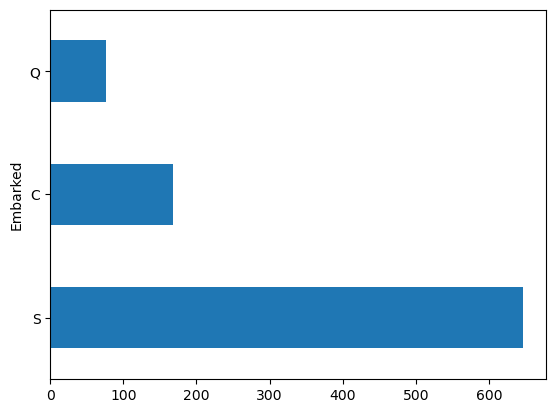

In [88]:
data_import_train['Embarked'].value_counts().plot(kind='barh')

<Axes: ylabel='Sex'>

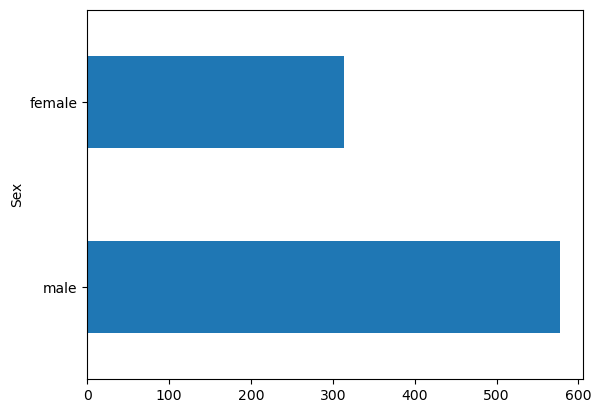

In [89]:
data_import_train['Sex'].value_counts().plot(kind='barh')

In [90]:
from sklearn.preprocessing import OneHotEncoder

# Categorical columns
categorical_cols = ['Sex', 'Embarked']

# Create encoder
encoder = OneHotEncoder(sparse_output=False)  

# Transform training data
encoded_train = pd.DataFrame(
    encoder.fit_transform(data_import_train[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

# Transform test data
encoded_test = pd.DataFrame(
    encoder.transform(data_import_test[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

# Drop categorical columns from the original data and add new encoded columns
data_import_train = data_import_train.drop(categorical_cols, axis=1).reset_index(drop=True)
data_import_test = data_import_test.drop(categorical_cols, axis=1).reset_index(drop=True)

data_import_train = pd.concat([data_import_train, encoded_train], axis=1)
data_import_test = pd.concat([data_import_test, encoded_test], axis=1)


In [91]:
data_import_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Sex_female   418 non-null    float64
 9   Sex_male     418 non-null    float64
 10  Embarked_C   418 non-null    float64
 11  Embarked_Q   418 non-null    float64
 12  Embarked_S   418 non-null    float64
dtypes: float64(7), int64(4), object(2)
memory usage: 42.6+ KB


In [92]:
data_import_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.500000,0,0,330911,7.8292,0.0,1.0,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.000000,1,0,363272,7.0000,1.0,0.0,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",62.000000,0,0,240276,9.6875,0.0,1.0,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",27.000000,0,0,315154,8.6625,0.0,1.0,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.000000,1,1,3101298,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",29.699118,0,0,A.5. 3236,8.0500,0.0,1.0,0.0,0.0,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.000000,0,0,PC 17758,108.9000,1.0,0.0,1.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.500000,0,0,SOTON/O.Q. 3101262,7.2500,0.0,1.0,0.0,0.0,1.0
416,1308,3,"Ware, Mr. Frederick",29.699118,0,0,359309,8.0500,0.0,1.0,0.0,0.0,1.0


### Scaling

In [93]:
from sklearn.preprocessing import StandardScaler

# Exclude 'Survived' (target variable) while selecting numeric columns
numeric_cols = data_import_train.select_dtypes(include=['int64', 'float64']).columns.drop('Survived')

# Separate only the numeric columns
data_import_train_numeric = data_import_train[numeric_cols]
data_import_test_numeric = data_import_test[numeric_cols]

# Standardize using StandardScaler
scaler = StandardScaler()

# Transform training and test sets
data_import_train_scaled = scaler.fit_transform(data_import_train_numeric)
data_import_test_scaled = scaler.transform(data_import_test_numeric)

# Convert standardized data back to DataFrame format
data_import_train_scaled = pd.DataFrame(data_import_train_scaled, columns=numeric_cols)
data_import_test_scaled = pd.DataFrame(data_import_test_scaled, columns=numeric_cols)

# Separate the target variable
y_train = data_import_train['Survived']

# Final outputs
print("Training data (standardized):")
print(data_import_train_scaled.head())
print("\nTarget variable (y_train):")
print(y_train.head())
print("\nTest data (standardized):")
print(data_import_test_scaled.head())


Training data (standardized):
   PassengerId    Pclass       Age     SibSp     Parch      Fare  Sex_female  \
0    -1.730108  0.827377 -0.592481  0.432793 -0.473674 -0.502445   -0.737695   
1    -1.726220 -1.566107  0.638789  0.432793 -0.473674  0.786845    1.355574   
2    -1.722332  0.827377 -0.284663 -0.474545 -0.473674 -0.488854    1.355574   
3    -1.718444 -1.566107  0.407926  0.432793 -0.473674  0.420730    1.355574   
4    -1.714556  0.827377  0.407926 -0.474545 -0.473674 -0.486337   -0.737695   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0  0.737695   -0.482043   -0.307562    0.615838  
1 -1.355574    2.074505   -0.307562   -1.623803  
2 -1.355574   -0.482043   -0.307562    0.615838  
3 -1.355574   -0.482043   -0.307562    0.615838  
4  0.737695   -0.482043   -0.307562    0.615838  

Target variable (y_train):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Test data (standardized):
   PassengerId    Pclass       Age     SibSp     Parch      Fare  Sex_

Test verisinde target değer yok. Submission için kullanılacak. Bu nedenle bir cross validation datası oluşturmak gerekecek.

In [94]:
from sklearn.model_selection import train_test_split

# First, separate the training data (data_import_train_scaled) and target variable (y_train)
X_train_full = data_import_train_scaled
y_train_full = y_train

# Split the training data into training and cross-validation sets
X_train, X_cv, y_train, y_cv = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# Test data is already scaled: data_import_test_scaled
X_test = data_import_test_scaled

# Check the outputs
print("Training Data (X_train) Shape:", X_train.shape)
print("Cross-Validation Data (X_cv) Shape:", X_cv.shape)
print("Test Data (X_test) Shape:", X_test.shape)

print("\nTraining Target Variable (y_train) Shape:", y_train.shape)
print("Cross-Validation Target Variable (y_cv) Shape:", y_cv.shape)


Training Data (X_train) Shape: (712, 11)
Cross-Validation Data (X_cv) Shape: (179, 11)
Test Data (X_test) Shape: (418, 11)

Training Target Variable (y_train) Shape: (712,)
Cross-Validation Target Variable (y_cv) Shape: (179,)


### Preprocessing Steps
1. Filled missing `Age` values using the median grouped by `Pclass` and `Sex`.
2. Encoded the `Sex` and `Embarked` features using label encoding.
3. Dropped the `Cabin` feature due to excessive missing data.
4. Scaled the `Fare` feature to ensure uniformity.


## Step 4: Model Training and Evaluation

We evaluate multiple machine learning models to predict survival. Metrics such as accuracy, precision, recall, and F1-score are used for assessment.


### Model: K Neighbors Classifying
- Achieved an accuracy of ~80% on the CV set.



In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# KNN modelini tanımlayın
knn = KNeighborsClassifier(n_neighbors=5)  # Varsayılan olarak 5 komşu kullanılır

# Modeli eğitme
knn.fit(X_train, y_train)

# Cross-validation verisi üzerinde tahmin yapma
y_cv_pred = knn.predict(X_cv)

# Performans Metrikleri
print("KNN Performans Raporu (Cross-Validation Seti):\n")
print(classification_report(y_cv, y_cv_pred))

# Doğruluk (Accuracy)
accuracy = accuracy_score(y_cv, y_cv_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_cv, y_cv_pred))


KNN Performans Raporu (Cross-Validation Seti):

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.7989

Confusion Matrix:
[[90 15]
 [21 53]]


### Model: Suppor Vector M.
- Achieved an accuracy of ~81% on the CV set.


In [122]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the SVM model
svm = SVC(kernel='rbf', random_state=42)  # RBF kernel is used by default

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the cross-validation data
y_cv_pred = svm.predict(X_cv)

# Performance Metrics
print("SVM Performance Report (Cross-Validation Set):\n")
print(classification_report(y_cv, y_cv_pred))

# Accuracy
accuracy = accuracy_score(y_cv, y_cv_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_cv, y_cv_pred))


SVM Performance Report (Cross-Validation Set):

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8101

Confusion Matrix:
[[93 12]
 [22 52]]


#### Tuning: SVM
- Using Randomized Search CV
- Best Parameters found as : {'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, 'C': 0.46415888336127775}
- Best Cross-Validation Score: 0.8146


In [123]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Define the SVC model
svm = SVC(random_state=42)

# Define the hyperparameter ranges
param_distributions = {
    'C': np.logspace(-3, 3, 10),          # C parameter: from 0.001 to 1000
    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 1, 6)),  # Gamma options
    'kernel': ['linear', 'rbf', 'poly'],  # Types of kernels
    'degree': [2, 3, 4]                   # Degree for polynomial kernel
}

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Evaluation metric
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Train the model
random_search.fit(X_train, y_train)

# Print the best parameters and performance
print("Best Parameters:", random_search.best_params_)
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")

# Make predictions on the cross-validation set
best_svc = random_search.best_estimator_
y_cv_pred = best_svc.predict(X_cv)

# Performance Metrics
print("\nSVC Performance Report (Cross-Validation Set):\n")
print(classification_report(y_cv, y_cv_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_cv, y_cv_pred))


Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, 'C': 0.46415888336127775}
Best Cross-Validation Score: 0.8146

SVC Performance Report (Cross-Validation Set):

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
[[93 12]
 [22 52]]


In [124]:
# Recreate and train the model with the best parameters
best_svc = SVC(
    kernel='rbf',
    C=0.46415888336127775,
    gamma=0.1,
    random_state=42
)

# Train the model on the training data
best_svc.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = best_svc.predict(X_test)

# Print the first 10 predictions
print("First 10 predictions on the test set:")
print(y_test_pred[:10])

# Add all predictions to a DataFrame
import pandas as pd

test_predictions = pd.DataFrame({
    'PassengerId': data_import_test['PassengerId'],  # Retrieve PassengerId from the test set
    'Survived': y_test_pred  # Predicted Survived values from the model
})

# Save the results to a CSV file (optional)
test_predictions.to_csv("titanic_test_predictions.csv", index=False)

print("\nTest set predictions saved to: titanic_test_predictions.csv")


First 10 predictions on the test set:
[0 1 0 0 1 0 1 0 1 0]

Test set predictions saved to: titanic_test_predictions.csv


### Model: Random Forest Classifier
- Achieved an accuracy of ~84% on the CV set.


In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the RFC mode
forest_clf = RandomForestClassifier(random_state=42)

# Train the model
forest_clf.fit(X_train, y_train)

# Make predictions on the cross-validation data
y_cv_pred = forest_clf.predict(X_cv)

# Performance Metrics
print("RFC Performance Report (Cross-Validation Set):\n")
print(classification_report(y_cv, y_cv_pred))

# Accuracy
accuracy = accuracy_score(y_cv, y_cv_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_cv, y_cv_pred))


RFC Performance Report (Cross-Validation Set):

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179

Accuracy: 0.8436

Confusion Matrix:
[[94 11]
 [17 57]]


#### Tuning: RFC
- Using Randomized Search CV
- Best Parameters found as:{'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 15}
- Best Cross-Validation Score: 0.8287


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter ranges
param_distributions = {
    'n_estimators': [10, 50, 100, 200, 500],  # Number of trees
    'max_depth': [None] + list(range(5, 21, 5)),  # Depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4, 10],  # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for splits
}

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Evaluation metric
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Train the model
random_search.fit(X_train, y_train)

# Print the best parameters and performance
print("Best Parameters:", random_search.best_params_)
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")

# Make predictions on the cross-validation set
best_rf = random_search.best_estimator_
y_cv_pred = best_rf.predict(X_cv)

# Performance Metrics
print("\nRandom Forest Performance Report (Cross-Validation Set):\n")
print(classification_report(y_cv, y_cv_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_cv, y_cv_pred))


Best Parameters: {'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 15}
Best Cross-Validation Score: 0.8287

Random Forest Performance Report (Cross-Validation Set):

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[92 13]
 [23 51]]


In [127]:
# Recreate and train the model with the best parameters
best_rfc = RandomForestClassifier(
    n_estimators=10,
    min_samples_split=20,
    min_samples_leaf=4,
    max_features='log2',
    max_depth=15,
    random_state=42
)

# Train the model on the training data
best_rfc.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = best_rfc.predict(X_test)

# Print the first 10 predictions
print("First 10 predictions on the test set:")
print(y_test_pred[:10])

# Add all predictions to a DataFrame
import pandas as pd

test_predictions = pd.DataFrame({
    'PassengerId': data_import_test['PassengerId'],  # Retrieve PassengerId from the test set
    'Survived': y_test_pred  # Predicted Survived values from the model
})

# Save the results to a CSV file (optional)
test_predictions.to_csv("titanic_test_predictions.csv", index=False)

print("\nTest set predictions saved to: titanic_test_predictions.csv")


First 10 predictions on the test set:
[0 0 0 0 1 0 1 0 1 0]

Test set predictions saved to: titanic_test_predictions.csv
